In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import preprocessing

sns.set()

In [2]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_2021_1_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_2021_1_GID))

# Preprocesamiento

## Conversión de variables

Hay que convertir todos los features categóricos a números. Para variables categóricas se usarán Dummy Variables y para ordinales OrdinalEncoder.

In [3]:
X = df.drop('tiene_alto_valor_adquisitivo', axis=1)
X = preprocessing.ordinal_encode(X)
X = preprocessing.dummy_variables(X)

## Normalización

In [4]:
from sklearn import preprocessing as preproc 

normalizer = preproc.Normalizer()
X = normalizer.transform(X)

## Reducción de dimensionalidad: PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(X)
X = pca.transform(X)
X.shape

(32561, 4)

Con 4 componentes principales se cubre el 99% de la varianza.

# SVM: entrenamiento y búsqueda de hiperparámetros.

### Cross validation

Se usa una baja proporción de datos para train para acelerar el entrenamiento de SVM.

In [6]:
y = df.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = preprocessing.dataset_split(pd.DataFrame(X), y, test_size = 0.70)
print(f'X_train tiene {len(X_train)} elementos')

X_train tiene 9768 elementos


Se usa GridSearch para buscar la mejor combinación de hiperparámetros. Se elige la mejor combinación según su score de la curva ROC-AUC. 

## Kernel lineal

In [7]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

clf = svm.SVC(kernel='linear', cache_size = 400)
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

gscv_lineal = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

gscv_lineal.best_params_

{'C': 1, 'gamma': 'scale'}

### Métricas


Curva AUC-ROC, Accuracy, Precision, Recall, F1 score:

Accuracy: 0.7790988461369719 
Precision: 0.6207446808510638 
Recall: 0.9587956541840037 
F1-score: 0.31673225675125527 
Curva ROC-AUC:


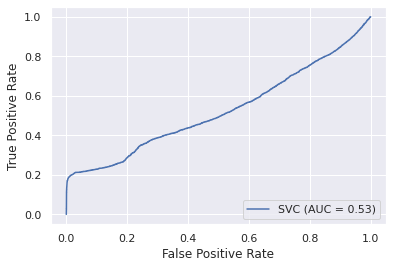

In [8]:
from sklearn.metrics import plot_roc_curve

(accuracy, precision, recall, f1score, roc) = preprocessing.calcular_metricas(y_test, gscv_lineal.best_estimator_.predict(X_test))
print(f"Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1-score: {f1score} \nCurva ROC-AUC:")
roc = plot_roc_curve(gscv_lineal.best_estimator_, X_test, y_test)

## Kernel polinomial

In [9]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

clf = svm.SVC(kernel='poly', cache_size = 400)
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'degree': [2, 3]}

gscv_poly = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

gscv_poly.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 'auto'}

### Métricas


Curva AUC-ROC, Accuracy, Precision, Recall, F1 score:

Accuracy: 0.7791427192559119 
Precision: 0.6210750399148484 
Recall: 0.9588534442903375 
F1-score: 0.3167752442996743 
Curva ROC-AUC:


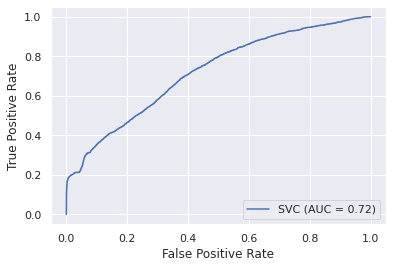

In [10]:
from sklearn.metrics import plot_roc_curve

(accuracy, precision, recall, f1score, roc) = preprocessing.calcular_metricas(y_test, gscv_poly.best_estimator_.predict(X_test))
print(f"Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1-score: {f1score} \nCurva ROC-AUC:")
roc = plot_roc_curve(gscv_poly.best_estimator_, X_test, y_test)

## Kernel radial

In [11]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

clf = svm.SVC(kernel='rbf', cache_size = 400)
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

gscv_rbf = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

gscv_rbf.best_params_

{'C': 1, 'gamma': 'scale'}

### Métricas


Curva AUC-ROC, Accuracy, Precision, Recall, F1 score:

Accuracy: 0.782740315008994 
Precision: 0.5931321540062435 
Recall: 0.9322122052704577 
F1-score: 0.40850453893932154 
Curva ROC-AUC:


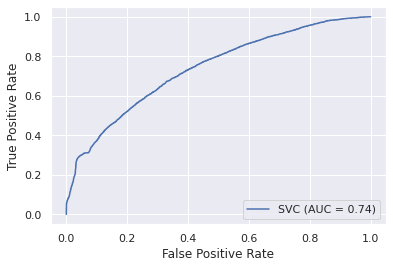

In [12]:
from sklearn.metrics import plot_roc_curve

(accuracy, precision, recall, f1score, roc) = preprocessing.calcular_metricas(y_test, gscv_rbf.best_estimator_.predict(X_test))
print(f"Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1-score: {f1score} \nCurva ROC-AUC:")
roc = plot_roc_curve(gscv_rbf.best_estimator_, X_test, y_test)

## Kernel sigmoideo

In [13]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

clf = svm.SVC(kernel='sigmoid', cache_size = 400)
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'] }

gscv_sig = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

gscv_sig.best_params_

{'C': 0.1, 'gamma': 'auto'}

### Métricas


Curva AUC-ROC, Accuracy, Precision, Recall, F1 score:

Accuracy: 0.7790988461369719 
Precision: 0.6207446808510638 
Recall: 0.9587956541840037 
F1-score: 0.31673225675125527 
Curva ROC-AUC:


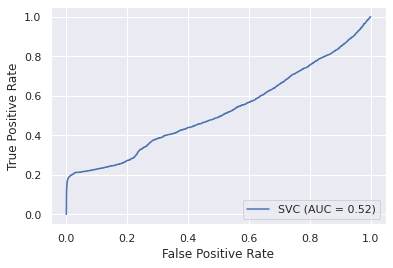

In [14]:
from sklearn.metrics import plot_roc_curve

(accuracy, precision, recall, f1score, roc) = preprocessing.calcular_metricas(y_test, gscv_sig.best_estimator_.predict(X_test))
print(f"Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nF1-score: {f1score} \nCurva ROC-AUC:")
roc = plot_roc_curve(gscv_sig.best_estimator_, X_test, y_test)